In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')
y= train['Survived']
#sns.pairplot(train, hue='Survived')
train = train.drop('Survived',axis=1)
all = pd.concat([train,test],axis=0)

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
all = all.drop(['Name','Ticket','Cabin'],axis=1)

In [6]:
sex_age = pd.pivot_table(data=all, index='Pclass', columns='Sex',aggfunc='mean')['Age']
int(sex_age['female'][1])

37

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

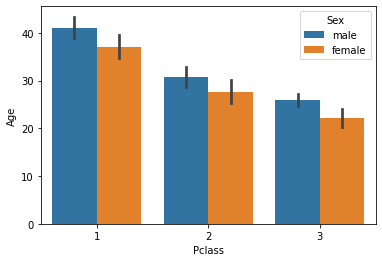

In [7]:
sns.barplot(data=all, x='Pclass', y='Age', estimator=np.mean,hue='Sex')

In [8]:
combo = all.copy()

In [9]:
combo.iloc[31]

PassengerId          32
Pclass                1
Sex              female
Age                 NaN
SibSp                 1
Parch                 0
Fare           146.5208
Embarked              C
Name: 31, dtype: object

In [10]:
for i in combo['Sex'].unique():
    for j in combo['Pclass'].unique():
        combo.loc[(combo['Pclass'] == j)&(combo['Sex'] == i)&(combo['Age'].isna()),'Age'] = int(sex_age[i][j])

In [11]:
combo.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       2
dtype: int64

<AxesSubplot:>

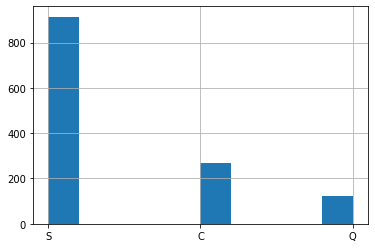

In [12]:
combo['Embarked'].hist()

In [13]:
combo['Fare'].fillna(combo['Fare'].mean,inplace=True)

<AxesSubplot:>

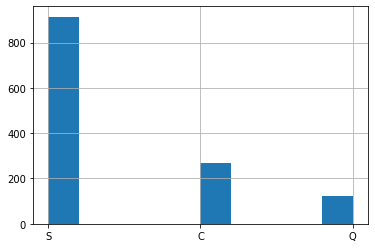

In [14]:
combo['Embarked'].hist()

In [15]:
combo['Embarked'].fillna('S',inplace=True)

In [16]:
combo = combo.drop('PassengerId',axis=1)

In [17]:
combo = combo.drop('Fare',axis=1)

In [18]:
combo.select_dtypes('object')

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [19]:
combo  = pd.get_dummies(combo)

In [20]:
combo

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,0,1,0,0,1
414,1,39.0,0,0,1,0,1,0,0
415,3,38.5,0,0,0,1,0,0,1
416,3,25.0,0,0,0,1,0,0,1


In [21]:
train = combo.iloc[0:891]
test = combo.iloc[891:]

In [22]:
train

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
888,3,22.0,1,2,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


In [23]:
test

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,0,1,0,0,1
414,1,39.0,0,0,1,0,1,0,0
415,3,38.5,0,0,0,1,0,0,1
416,3,25.0,0,0,0,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=10)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from catboost import CatBoostClassifier

In [27]:
models = {'KNeighborsClassifier':KNeighborsClassifier(),
          #'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          #'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB(),
          'CatBoostClassifier':CatBoostClassifier(verbose=0)
          
         }

In [28]:
score = []
results = pd.DataFrame(y_test)
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score.append([name,accuracy_score(y_test,y_pred)])
    results[name] = y_pred
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
1,SVC,0.844444
2,DecisionTreeClassifier,0.844444
5,CatBoostClassifier,0.844444
0,KNeighborsClassifier,0.822222
3,AdaBoostClassifier,0.822222
4,GaussianNB,0.800000


In [29]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train,y_train)
cat_pred = cat.predict(test)
# CAT0.76076 

In [30]:
svc_param = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

svc = SVC(**svc_param)
svc.fit(X_train,y_train)
svc_pred = svc.predict(test)
#SVC = 0.78468

In [31]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.801 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [34]:
testing = pd.DataFrame()

In [35]:
testing['cat'] = cat_pred
testing['svc'] = svc_pred

In [36]:
submission['Survived'] = svc_pred

In [37]:
submission.to_csv("submission.csv", index=False)

In [38]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
